## 1. Read the created CommonRoad scenario

/home/zhihao/anaconda3/envs/CarlaPractices/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


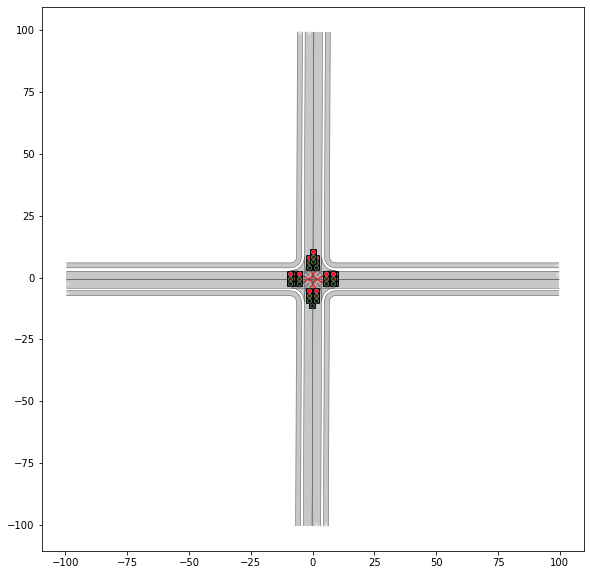

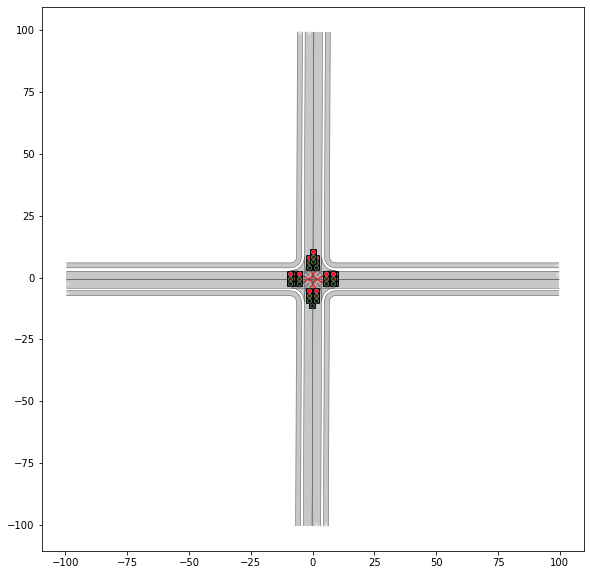

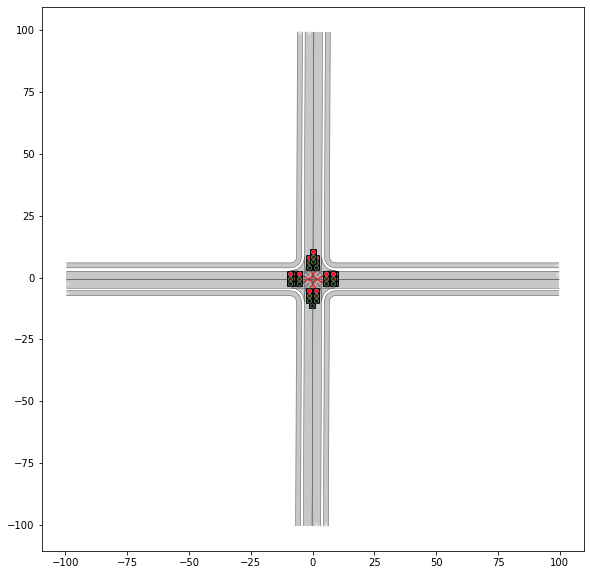

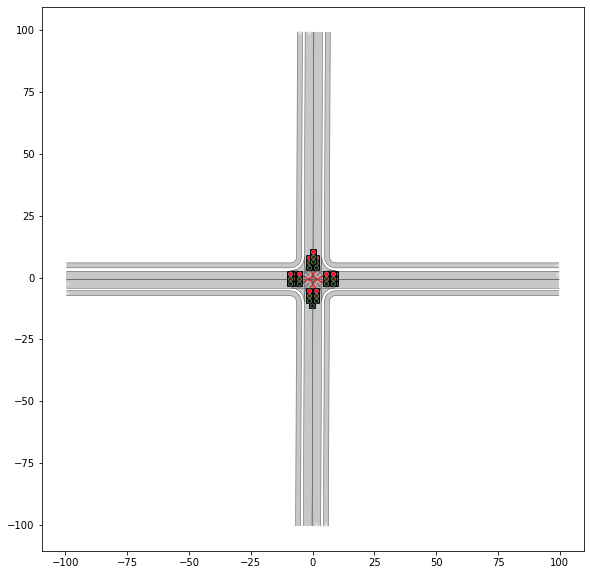

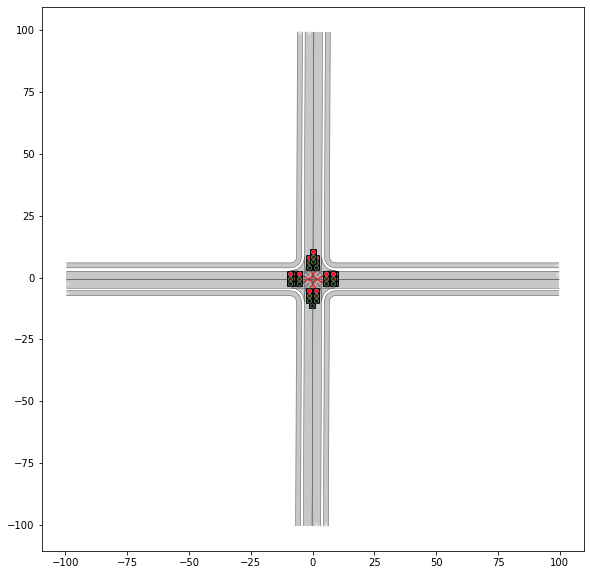

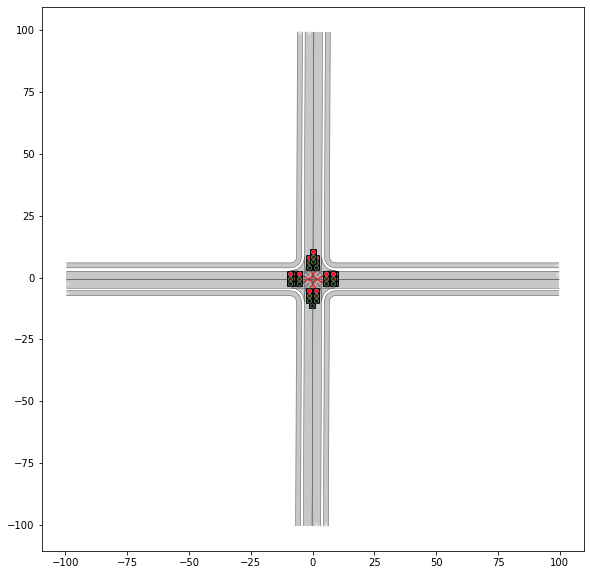

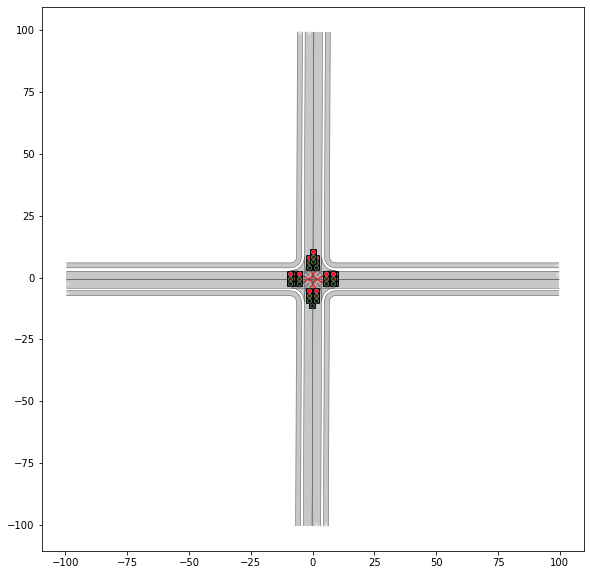

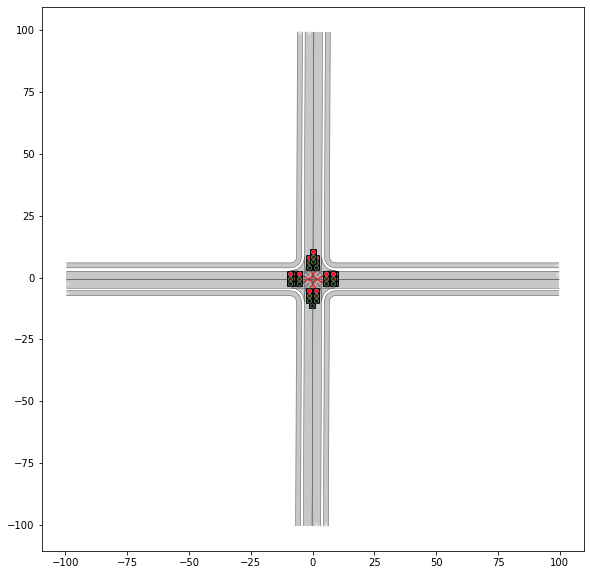

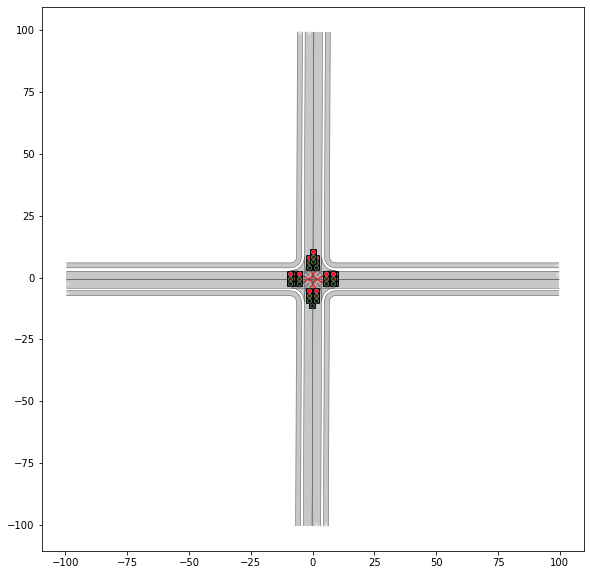

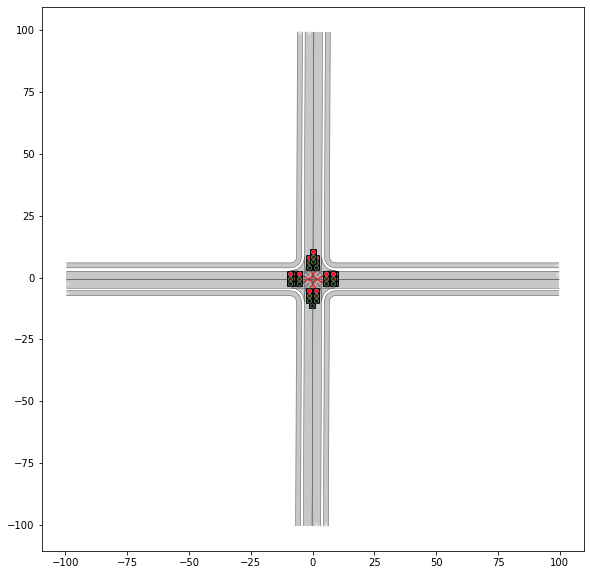

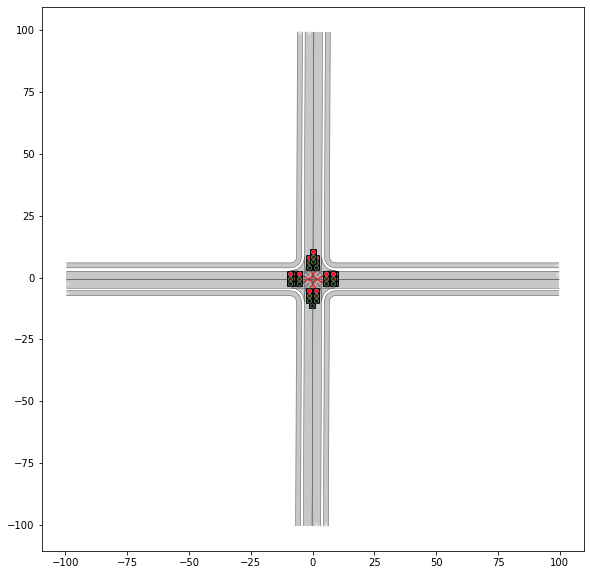

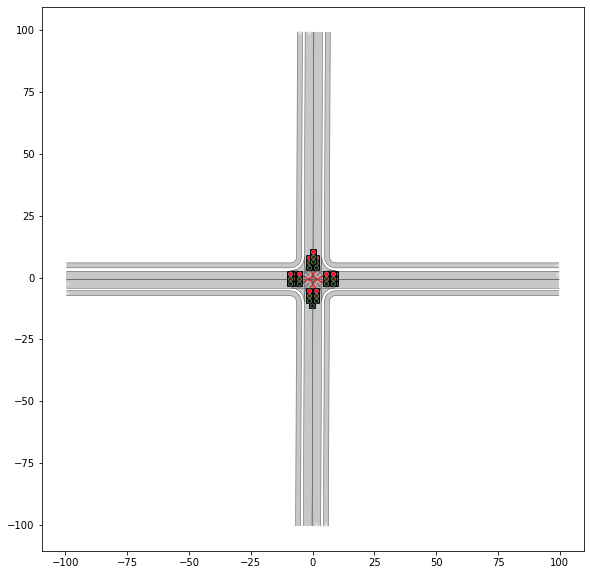

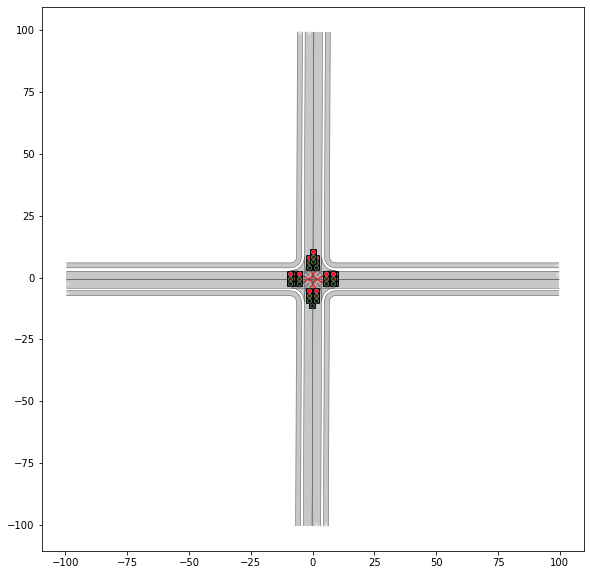

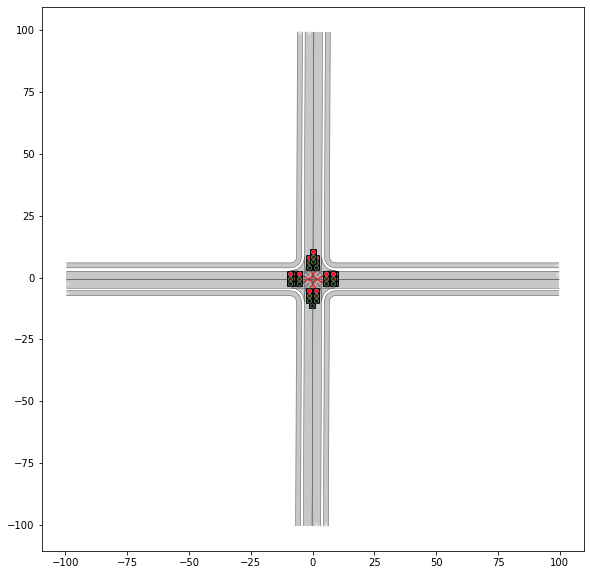

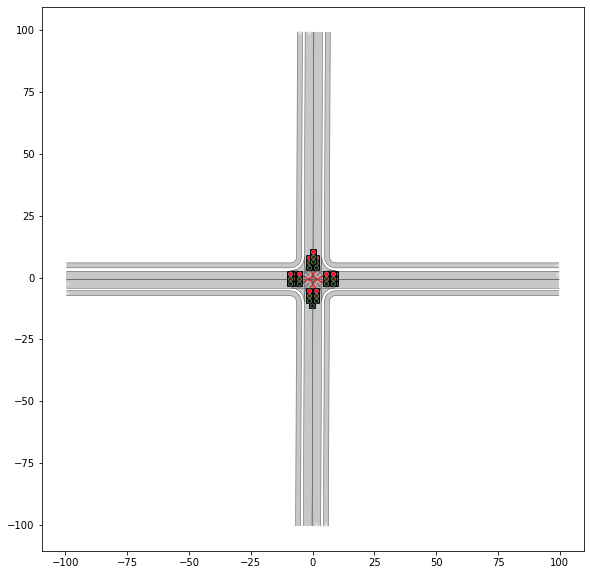

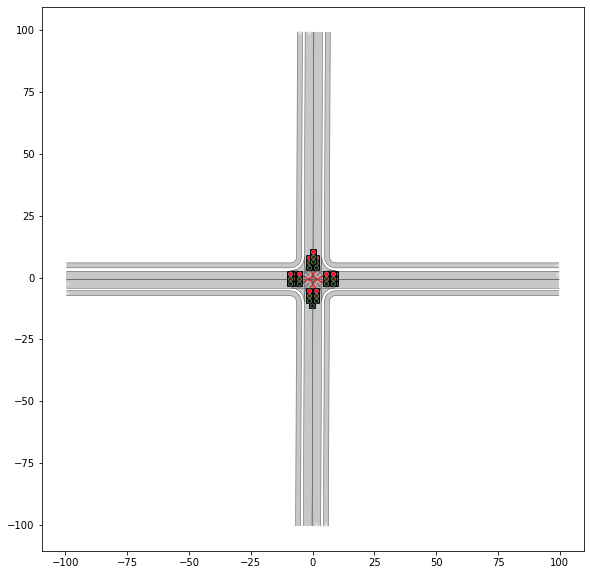

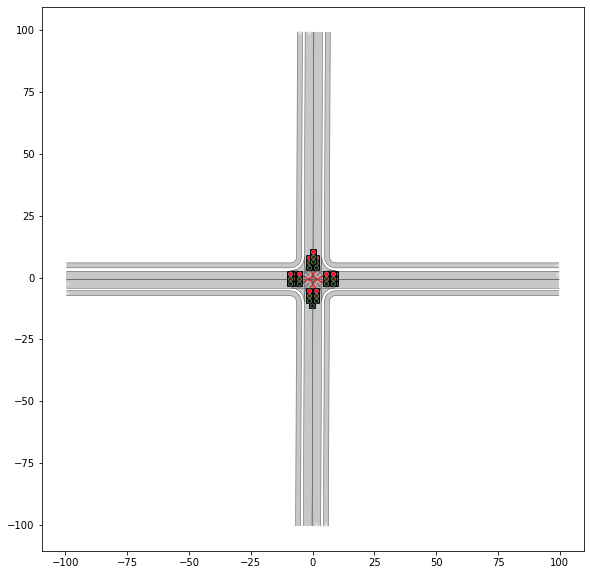

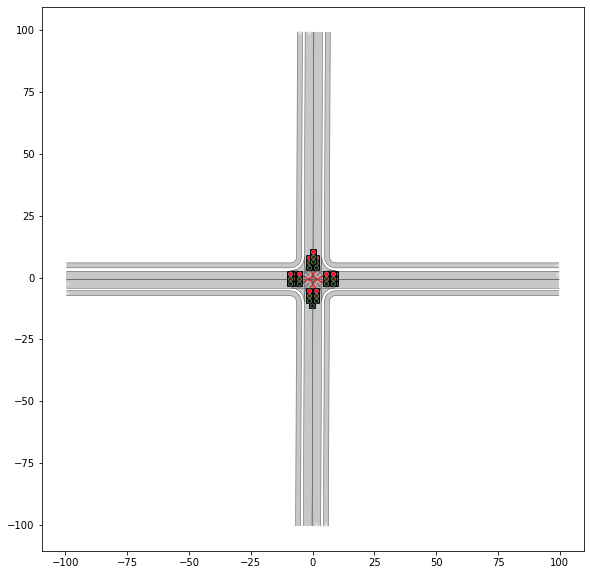

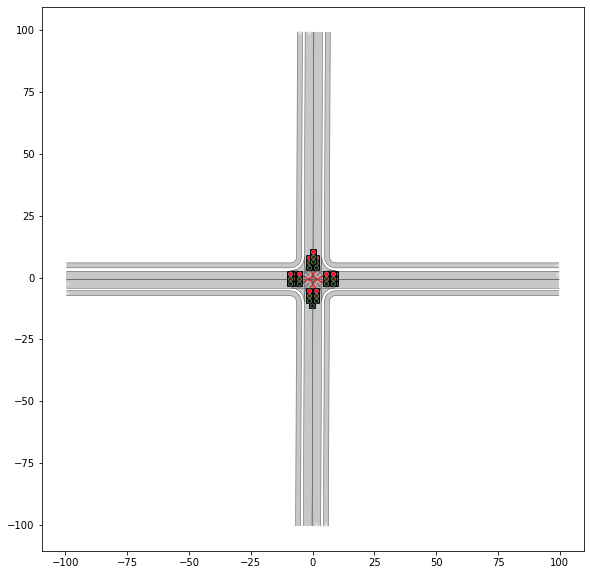

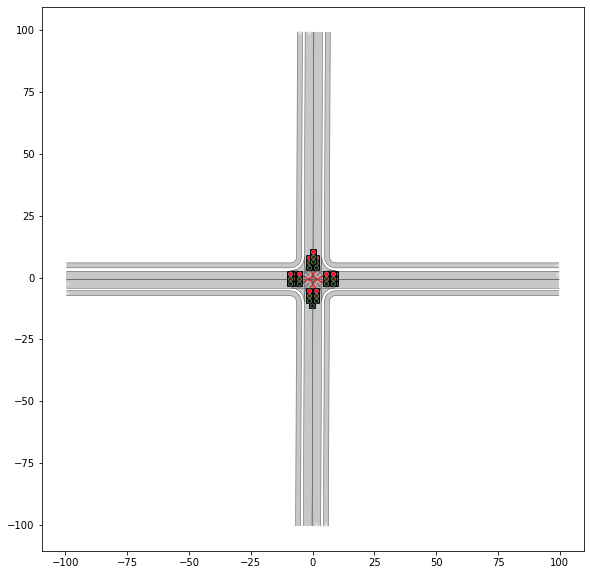

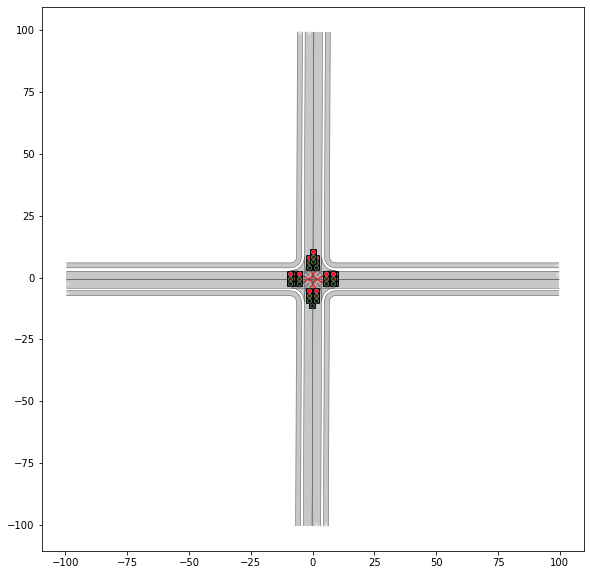

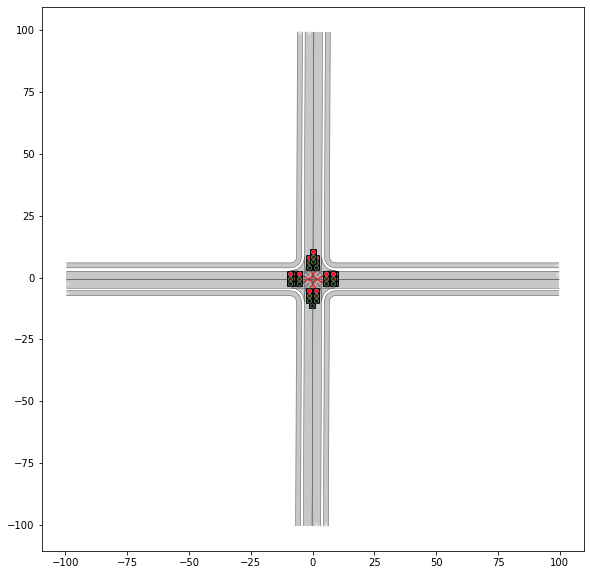

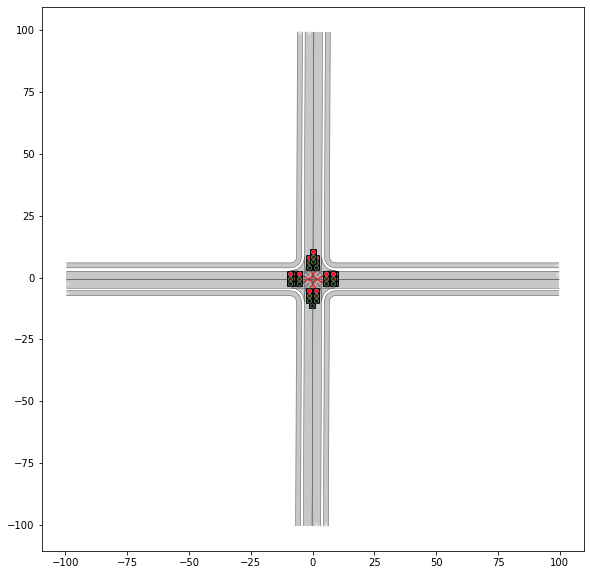

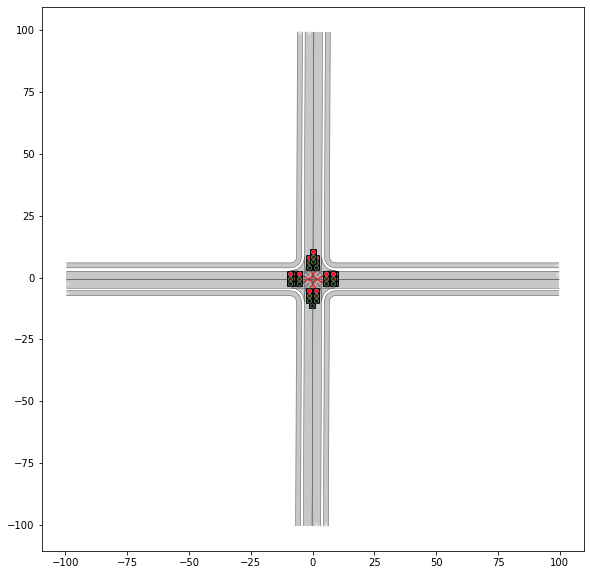

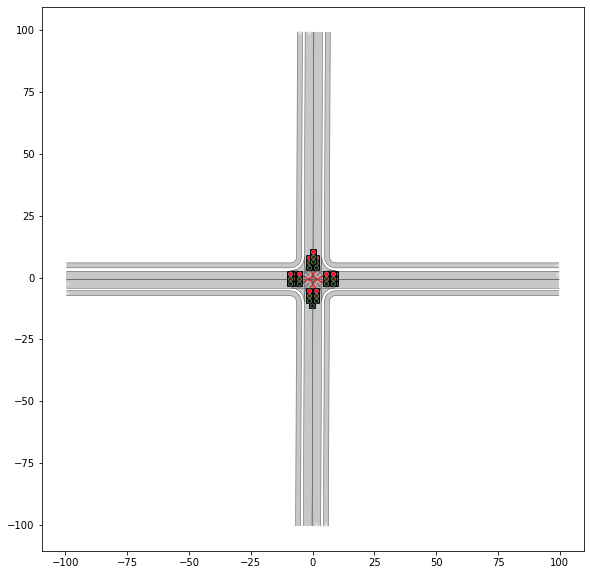

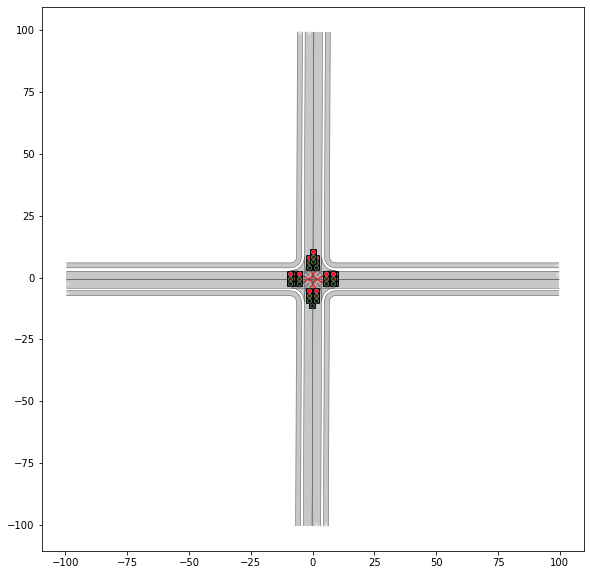

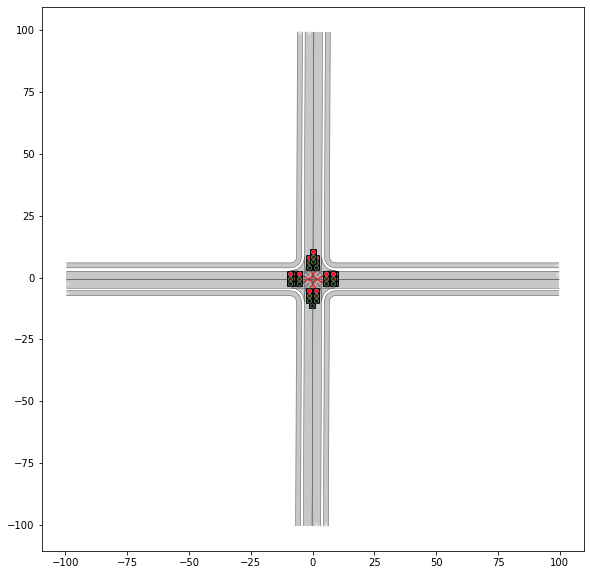

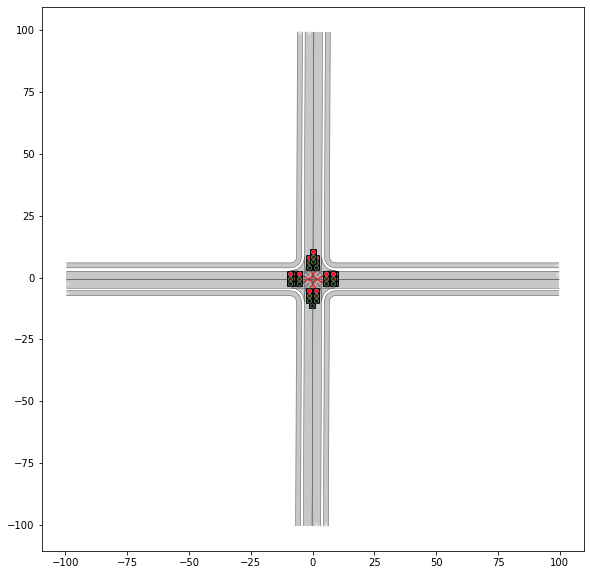

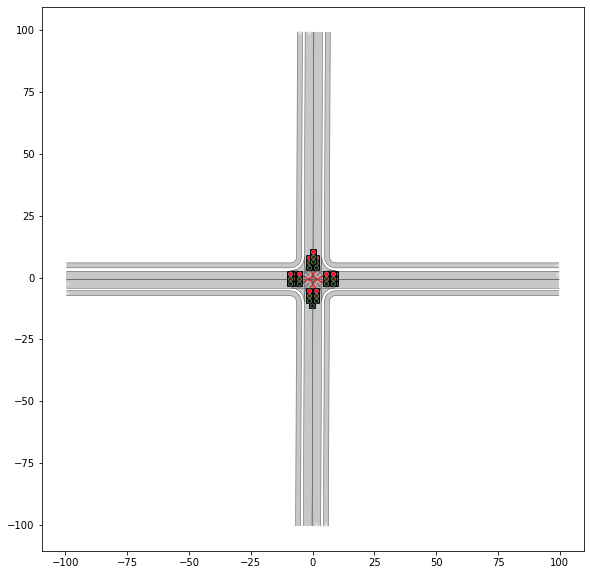

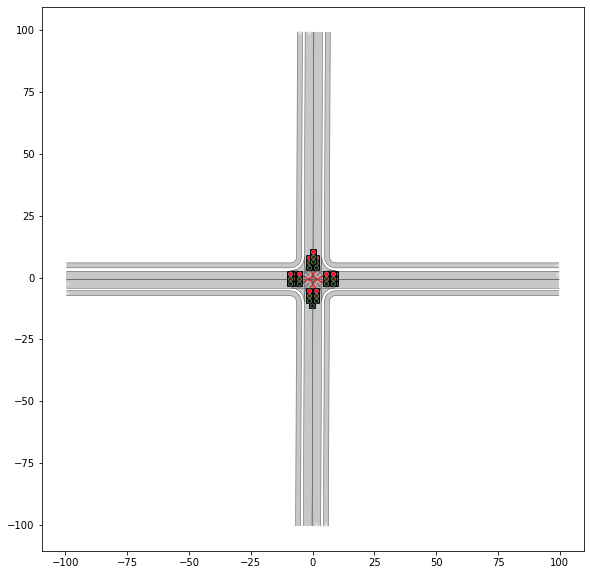

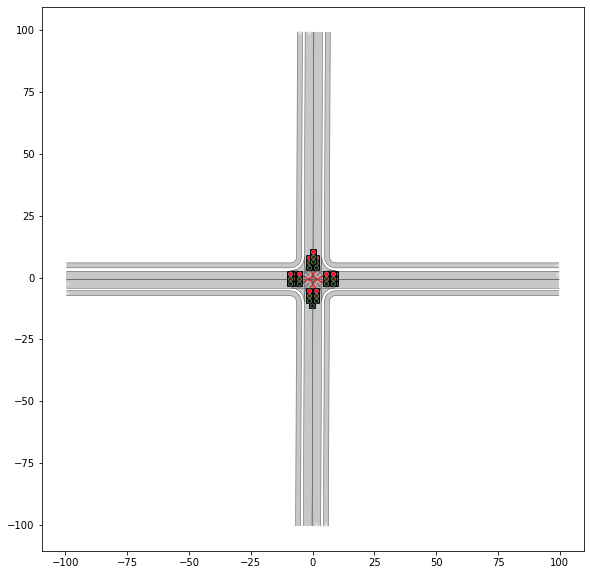

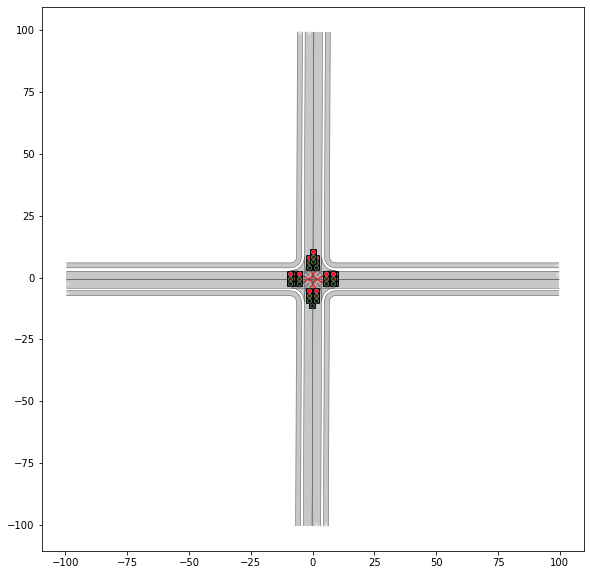

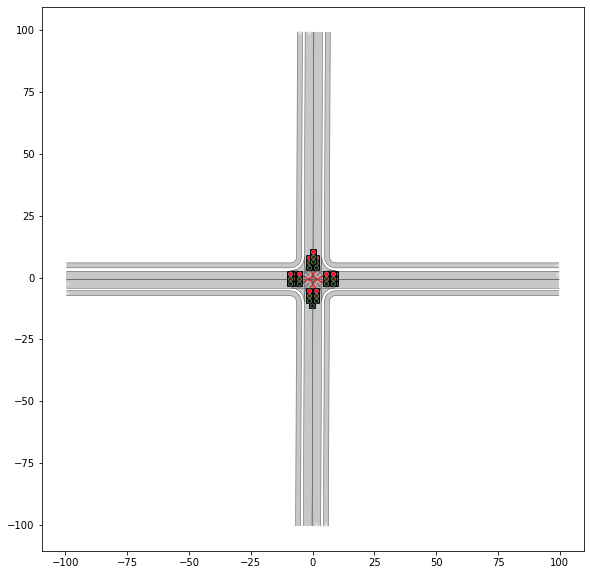

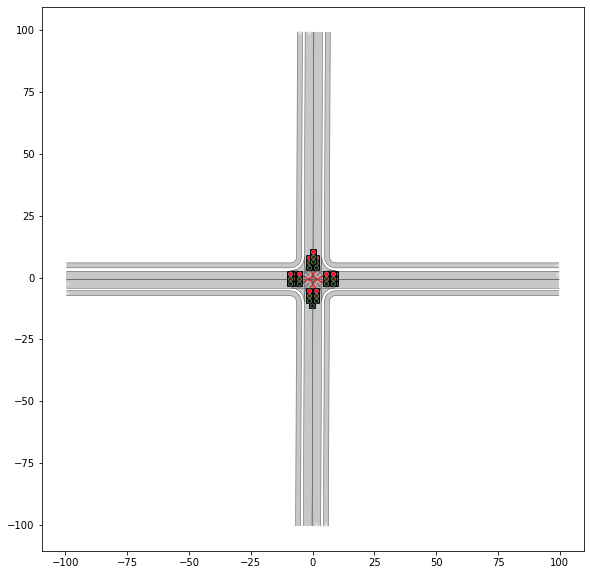

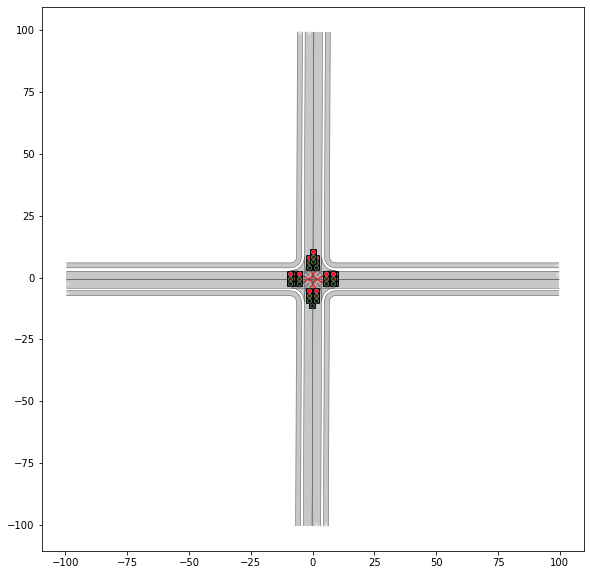

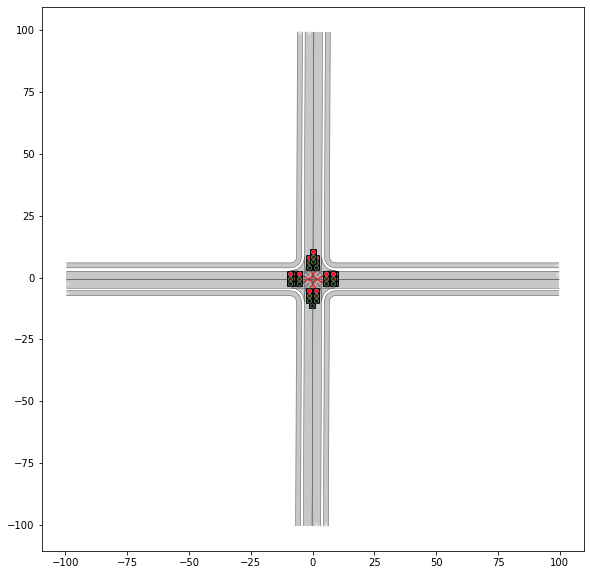

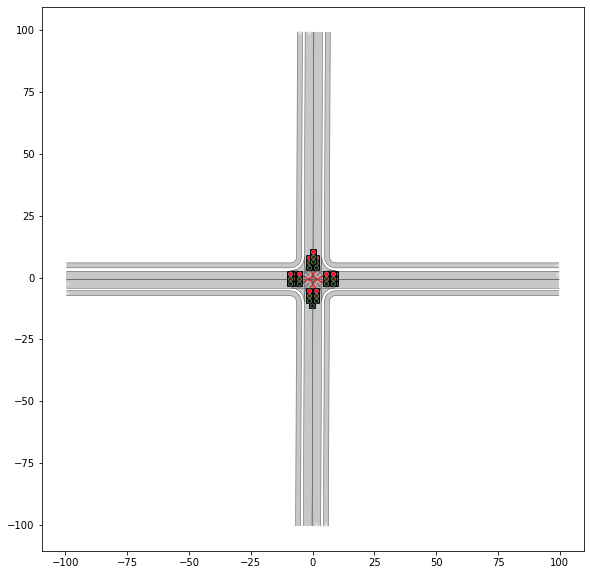

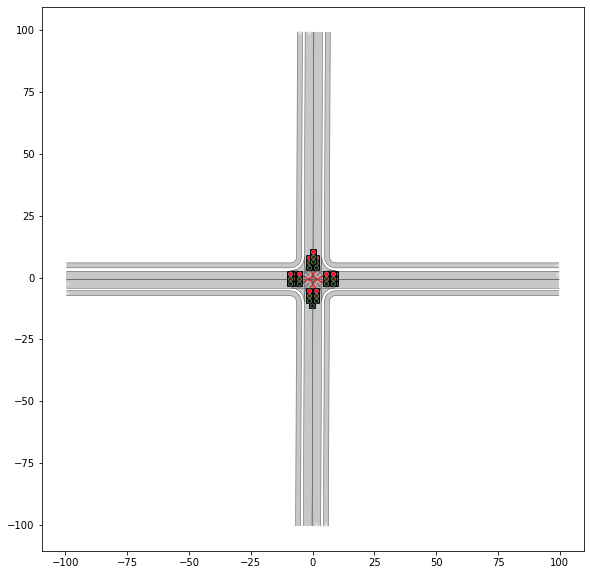

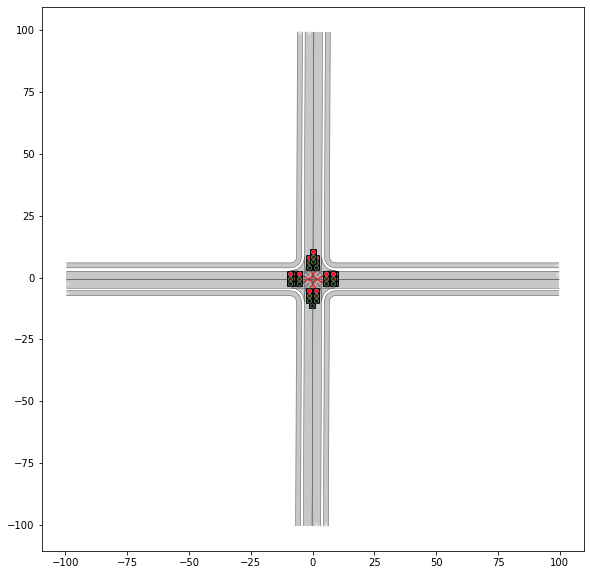

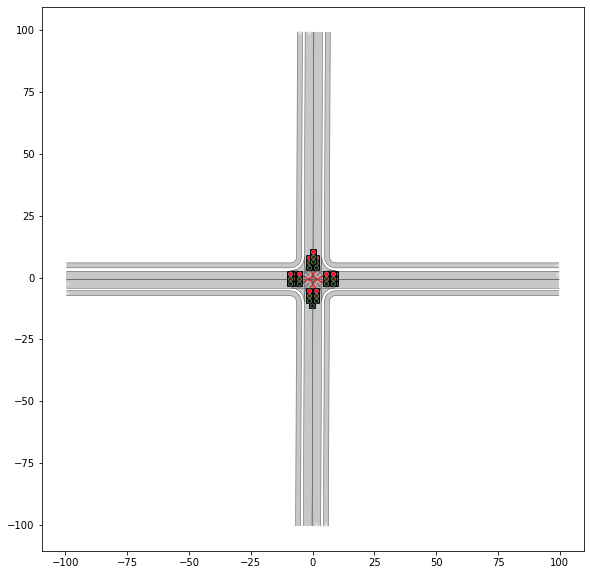

In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
from commonroad.common.file_reader import CommonRoadFileReader
from commonroad.visualization.mp_renderer import MPRenderer

# load the CommonRoad scenario that has been created in the CommonRoad tutorial
file_path = os.path.join(os.getcwd(), '/home/zhihao/PycharmProjects/CarlaPractices/scenario_xml/four_way_crossing.xml')

scenario, planning_problem_set = CommonRoadFileReader(file_path).open()

# plot the scenario for each time step
for i in range(0, 40):
    plt.figure(figsize=(25, 10))
    rnd = MPRenderer()
    scenario.draw(rnd, draw_params={'time_begin': i})
    planning_problem_set.draw(rnd)
    rnd.render()

### Helper Functions for visualization

In [2]:
try:
    import matplotlib.pyplot as plt
except ImportError:
    print('Matplotlib not installed. Please use pip(3) to install required package!')

try:
    import numpy as npy
except ImportError:
    print('Numpy not installed. Please use pip(3) to install required package!')

try:
    import vehiclemodels
except ImportError:
    print('commonroad-vehicle-models not installed. Please use pip install to install required package!')

try:
    import pkg_resources
    pkg_resources.require("scipy>=1.1.0")
    pkg_resources.require("cvxpy>=1.0.0")
    from cvxpy import *
except ImportError:
    print('CVXPy not installed or wrong version. Please use pip(3) to install required package!')

class TIConstraints:
    a_min = -8
    a_max = 15
    s_min = 0
    s_max = 150
    v_min = 0
    v_max = 35
    j_min = -30
    j_max = 30


def plot_state_vector(x : Variable, c : TIConstraints, s_obj = None):
    plt.figure(figsize=(10,10))
    N = x.shape[1]-1
    s_max = npy.maximum(150,100+0*npy.ceil(npy.amax((x.value)[0,:].flatten())*1.1/10)*10)

    # Plot (x_t)_1.
    plt.subplot(4,1,1)
    x1 = (x.value)[0,:].flatten()
    plt.plot(npy.array(range(N+1)),x1,'g')
    if s_obj is not None:
        plt.plot(npy.array(range(1,N+1)),s_obj[0],'b')
        plt.plot(npy.array(range(1,N+1)),s_obj[1],'r')
    plt.ylabel(r"$s$", fontsize=16)
    plt.yticks(npy.linspace(c.s_min, s_max, 3))
    plt.ylim([c.s_min, s_max])
    plt.xticks([])

    # Plot (x_t)_2.
    plt.subplot(4,1,2)
    x2 = (x.value)[1,:].flatten()
    plt.plot(npy.array(range(N+1)),x2,'g')
    plt.yticks(npy.linspace(c.v_min,c.v_max,3))
    plt.ylim([c.v_min, c.v_max+2])
    plt.ylabel(r"$v$", fontsize=16)
    plt.xticks([])

    # Plot (x_t)_3.
    plt.subplot(4,1,3)
    x2 = (x.value)[2,:].flatten()
    plt.plot(npy.array(range(N+1)),x2,'g')
    plt.yticks(npy.linspace(c.a_min,c.a_max,3))
    plt.ylim([c.a_min, c.a_max+2])
    plt.ylabel(r"$a$", fontsize=16)
    plt.xticks([])

    # Plot (x_t)_4.
    plt.subplot(4,1,4)
    x2 = (x.value)[3,:].flatten()
    plt.plot(npy.array(range(N+1)), x2,'g')
    plt.yticks(npy.linspace(c.j_min,c.j_max,3))
    plt.ylim([c.j_min-1, c.j_max+1])
    plt.ylabel(r"$j$", fontsize=16)
    plt.xticks(npy.arange(0,N+1,5))
    plt.xlabel(r"$k$", fontsize=16)
    plt.tight_layout()
    plt.show()

### Variables of the Optimization Problem

In [3]:
# problem data
N  = 40  # number of time steps
n  = 4   # length of state vector 
m  = 1   # length of input vector
dT = scenario.dt # time step


# set up variables
x = Variable(shape=(n,N+1)) # optimization vector x contains n states per time step 
print("x \n",x)
u = Variable(shape=(N)) # optimization vector u contains 1 state
print("u \n",u)
# set up constraints
c = TIConstraints()
c.a_min = -6 # Minimum feasible acceleration of vehicle
c.a_max = 6 # Maximum feasible acceleration of vehicle 6->3
c.s_min = 0 # Minimum allowed position
c.s_max = 100 # Maximum allowed position
c.v_min = 0 # Minimum allowed velocity (no driving backwards!)
c.v_max = 35 # Maximum allowed velocity (speed limit)
c.j_min = -15 # Minimum allowed jerk 
c.j_max = 15 # Maximum allowed jerk

# weights for cost function
w_s = 0
w_v = 8
w_a = 2
w_j = 2
Q = npy.eye(n)*npy.transpose(npy.array([w_s,w_v,w_a,w_j]))
w_u = 1
R = w_u

x 
 var1
u 
 var2


## Exercise 1: Consider the vehicle model
fourth-order point-mass model

In [4]:
A = npy.array([[1,dT,(dT**2)/2,(dT**3)/6],
               [0,1,dT,(dT**2)/2],
               [0,0,1,dT],
               [0,0,0,1]])
print("A \n",A)
B = npy.array([(dT**4)/24,
               (dT**3)/6,
               (dT**2)/2,
               dT]).reshape([n,])
print("B \n",B)

A 
 [[1.00000000e+00 1.00000000e-01 5.00000000e-03 1.66666667e-04]
 [0.00000000e+00 1.00000000e+00 1.00000000e-01 5.00000000e-03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 1.00000000e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00]]
B 
 [4.16666667e-06 1.66666667e-04 5.00000000e-03 1.00000000e-01]


### Formulation of the Optimization Problem

planning_problem: 
planning_problem_set: 
initial_state: 
 
position= [15.  0.]
orientation= 0.0
velocity= 22.0
yaw_rate= 0.0
slip_angle= 0.0
time_step= 0

                                     CVXPY                                     
                                     v1.2.1                                    
(CVXPY) Jun 23 03:02:47 AM: Your problem has 204 variables, 41 constraints, and 0 parameters.
(CVXPY) Jun 23 03:02:47 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jun 23 03:02:47 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jun 23 03:02:47 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY

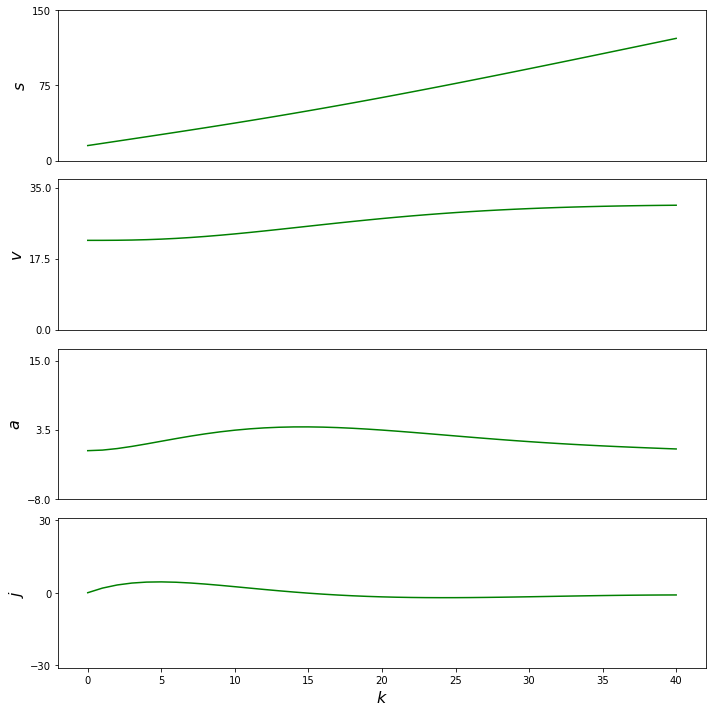

In [221]:
# get the initial state of the ego vehicle from the planning problem set
planning_problem = planning_problem_set.find_planning_problem_by_id(100)
initial_state = planning_problem.initial_state
print("planning_problem: \n", planning_problem)
print("planning_problem_set: \n", planning_problem_set)
print("initial_state: \n", initial_state)

# initial state of vehicle for the optimization problem (longitudinal position, velocity, acceleration, jerk)
x_0 = npy.array([initial_state.position[0],
                 initial_state.velocity,
                 0.0,
                 0.0]).reshape([n,]) # initial state

# reference velocity
v_ref = 30.0
# Set up optimization problem
states = []
cost = 0
# initial state constraint
constr = [x[:,0] == x_0]
# print("constraint: \n", constr)

for k in range(N):
    # cost function
    cost += quad_form(x[:,k+1] - npy.array([0,v_ref,0,0],), Q)\
           + R * u[k] ** 2
    # print("cost: \n", cost)
    # time variant state and input constraints
    constr.append(x[:,k+1] == A @ x[:,k] + B * u[k])
    # print("constrain: \n", constr)
    
# sums problem objectives and concatenates constraints.
# create optimization problem
prob = Problem(Minimize(cost), constr)
# print("prob: \n", prob)

# Solve optimization problem
prob.solve(verbose=True)
print("Problem is convex: ",prob.is_dcp())
print("Problem solution is: "+prob.status)

# plot results
plot_state_vector(x, TIConstraints())

## Exercise 2: Consider additional constraints

tiConstraintsvel: 
 [Inequality(Expression(AFFINE, UNKNOWN, (41,))), Inequality(Constant(CONSTANT, ZERO, ()))]
tiConstraintsacc: 
 [Inequality(Expression(AFFINE, UNKNOWN, (41,))), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, (41,))), Inequality(Constant(CONSTANT, NONPOSITIVE, ()))]
tiConstraintsjerk: 
 [Inequality(Expression(AFFINE, UNKNOWN, (41,))), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Expression(AFFINE, UNKNOWN, (41,))), Inequality(Constant(CONSTANT, NONPOSITIVE, ())), Inequality(Expression(AFFINE, UNKNOWN, (41,))), Inequality(Constant(CONSTANT, NONPOSITIVE, ()))]
Problem is convex:  True
Problem solution is optimal


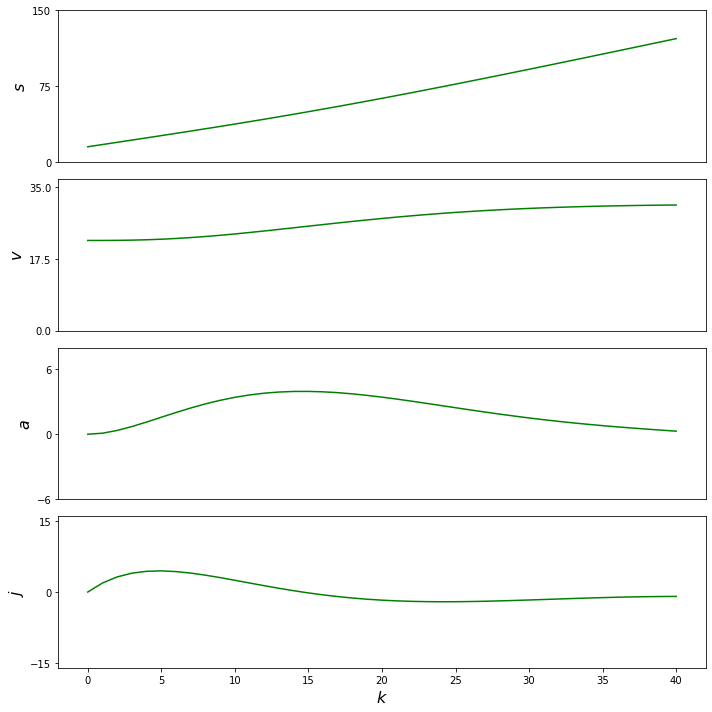

In [222]:
tiConstraints = [x[1,:] <= c.v_max, x[1,:] >= c.v_min] # velocity
print("tiConstraintsvel: \n", tiConstraints)
tiConstraints += [x[2,:] <= c.a_max, x[2,:] >= c.a_min] # acceleration
print("tiConstraintsacc: \n", tiConstraints)
tiConstraints += [x[3,:] <= c.j_max, x[3,:] >= c.j_min] # jerk
print("tiConstraintsjerk: \n", tiConstraints)

# Adjust problem
prob = Problem(Minimize(cost), constr + tiConstraints)

# Solve optimization problem
prob.solve()
print("Problem is convex: ",prob.is_dcp())
print("Problem solution is "+prob.status)

# plot results
plot_state_vector(x, c)

## Exercise 3: Extract the prediction of obstacles

Following vehicle id=42
Leading vehicle id=44


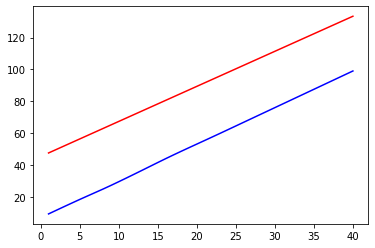

In [223]:
# extract obstacle from scenario
dyn_obstacles = scenario.dynamic_obstacles
#print("dyn_obstacles: \n",dyn_obstacles)

# create constraints for minimum and maximum position
s_min = [] # minimum position constraint
s_max = [] # maximum position constraint
# go through obstacle list and distinguish between following and leading vehicle
for o in dyn_obstacles:
    prediction = o.prediction.trajectory.state_list
    #print("prediction: \n", prediction[0].position[0])
    if o.initial_state.position[0] < x_0[0]:
        print('Following vehicle id={}'.format(o.obstacle_id))
        prediction = o.prediction.trajectory.state_list
        for p in prediction:
            #print(p)
            s_min.append(p.position[0]+o.obstacle_shape.length/2.+2.5)
            #print(s_min[0])
    elif len(s_max)==0 or prediction[0].position[0] < s_max[0]:
        print('Leading vehicle id={}'.format(o.obstacle_id))
        prediction = o.prediction.trajectory.state_list
        for p in prediction:
            s_max.append(p.position[0]-o.obstacle_shape.length/2.-2.5)
            
# plot vehicle motions
plt.plot(range(1,len(s_min)+1),s_min,'b')
plt.plot(range(1,len(s_max)+1),s_max,'r')

## Exercise 4: Plan the motion of the ego vehicle

[15. 22.  0.  0.]
                                     CVXPY                                     
                                     v1.2.1                                    
(CVXPY) Jun 23 03:02:56 AM: Your problem has 204 variables, 127 constraints, and 0 parameters.
(CVXPY) Jun 23 03:02:56 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jun 23 03:02:56 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jun 23 03:02:56 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jun 23 03:02:56 AM: Compiling problem (target solver=OSQP).
(CVXPY) Jun 23 03:02:56 AM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQ

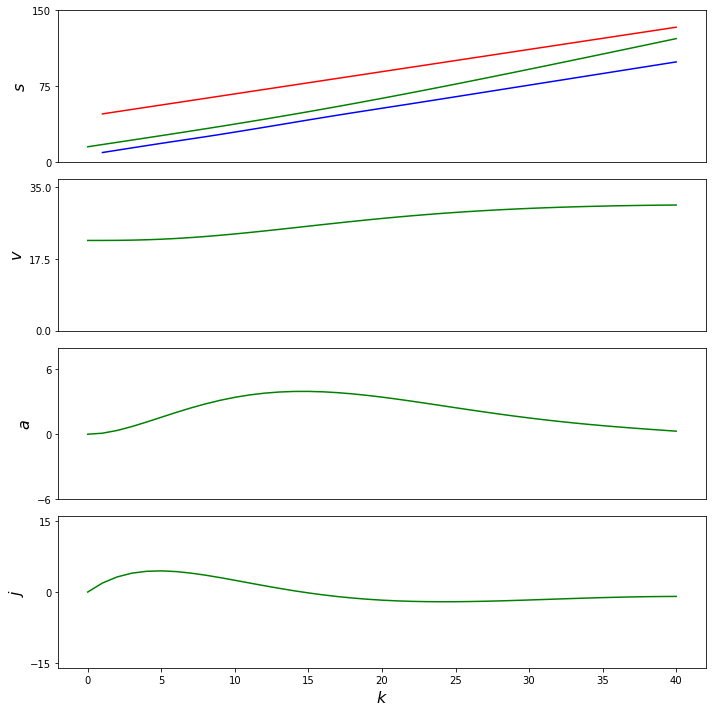

[ 15.          17.20007938  19.40124435  21.60599794  23.8178924
  26.04108161  28.27996812  30.53893071  32.82212004  35.13331115
  37.47580342  39.85235921  42.26517403  44.71587165  47.20551879
  49.73465463  52.30333099  54.91115995  57.5573661   60.24084087
  62.96019729  65.71382356  68.49993418  71.31661782  74.16188125
  77.03368883  79.92999734  82.84878593  85.78808126  88.7459778
  91.72065347  94.71038096  97.71353465 100.7285938  103.75414204
 106.78886353 109.83153619 112.88102228 115.93625662 118.99623288
 122.05998817]


In [224]:
# initial state of ego vehicle
x_0 = npy.array([initial_state.position[0],
                 initial_state.velocity,
                 0,
                 0]).reshape([n,]) # initial state
print(x_0)
# reference velocity
v_ref = 30.0

# Set up optimization problem
cost = 0
constr = [x[:,0] == x_0]
for k in range(N):
    # cost function
    cost += quad_form(x[:,k+1] - npy.array([0,v_ref,0,0],), Q)\
           + R * u[k] ** 2
    # single state and input constraints
    constr.append(x[:,k+1] == A @ x[:,k] + B * u[k])
    # add obstacle constraint
    constr.append(x[0,k+1] <= s_max[k])
    constr.append(x[0,k+1] >= s_min[k])

# sums problem objectives and concatenates constraints.
prob = sum(states)
# add constraints for all states & inputs
prob = Problem(Minimize(cost), constr + tiConstraints)


# Solve optimization problem
prob.solve(verbose=True)

print("Problem is convex:",prob.is_dcp())
print("Problem solution is "+prob.status)

# plot results
plot_state_vector(x, c, [s_min,s_max])

x_result = x.value
s_ego = x_result[0,:].flatten()
print(s_ego)
v_ego = x_result[1,:].flatten()

## Exercise 5

/home/zhihao/anaconda3/envs/CarlaPractices/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


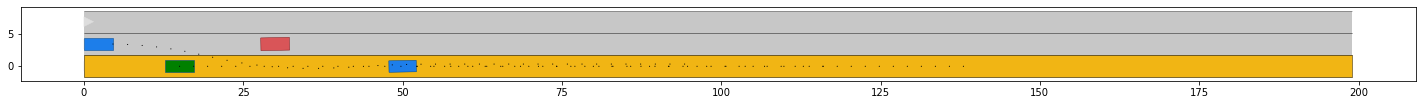

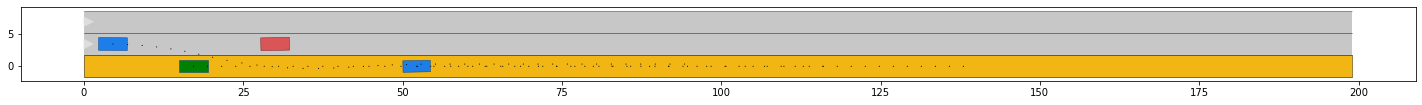

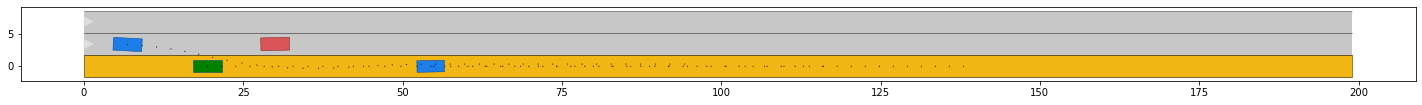

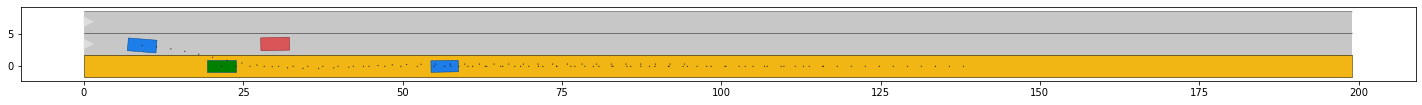

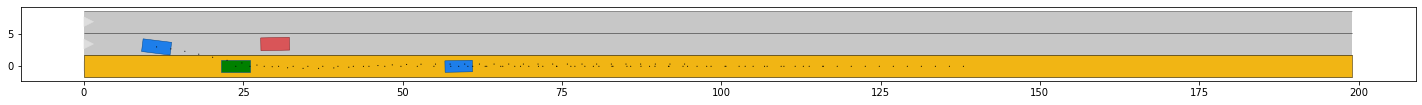

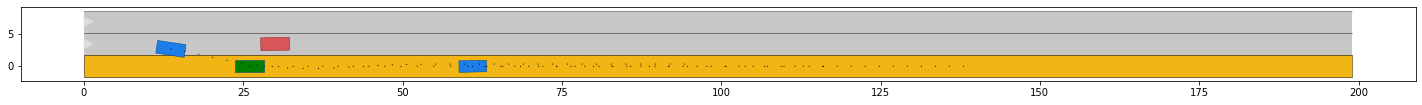

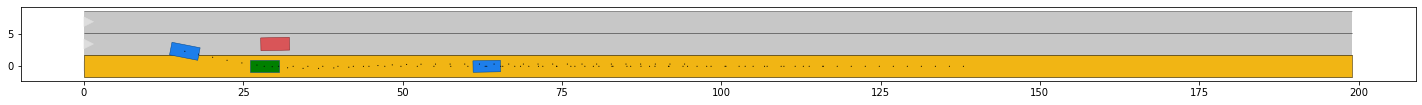

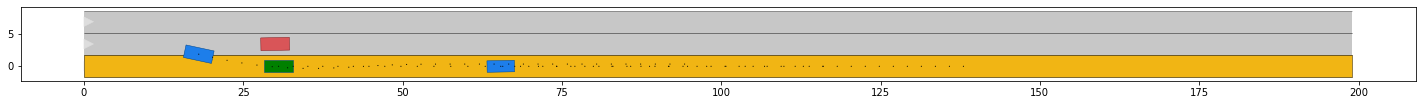

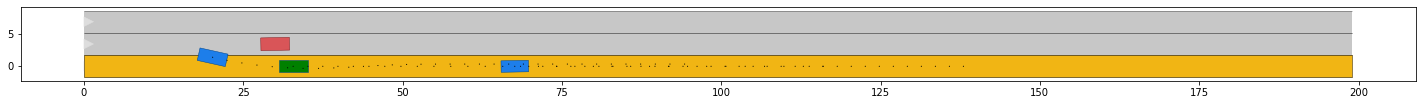

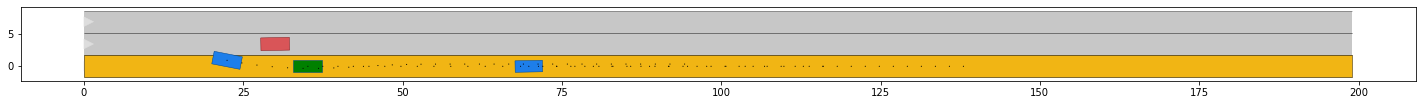

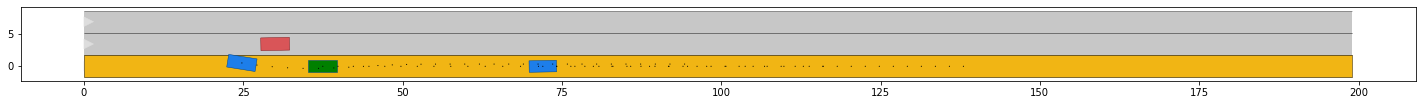

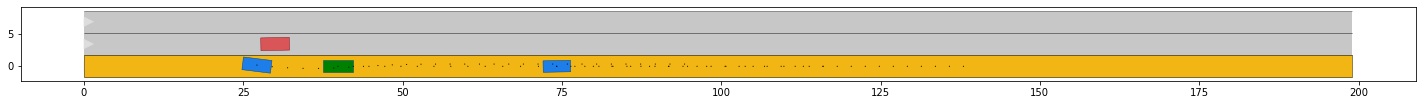

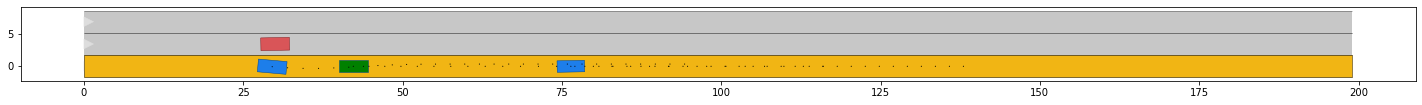

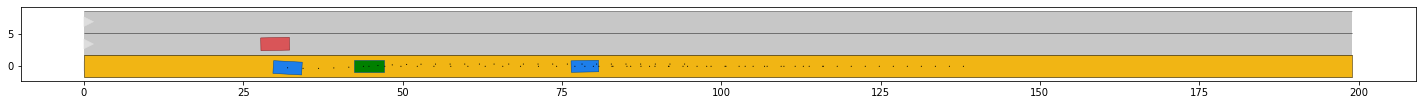

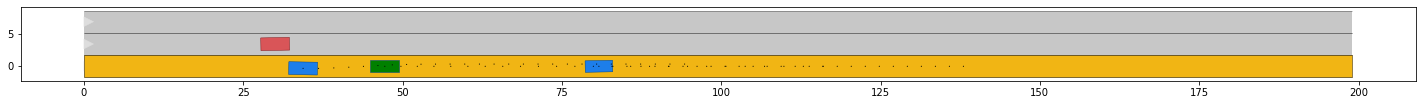

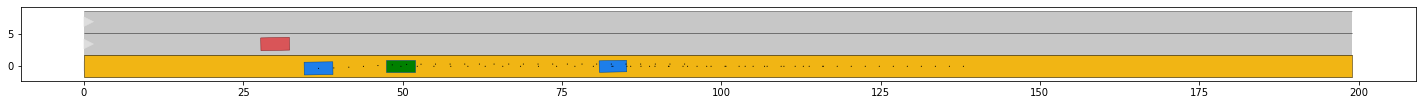

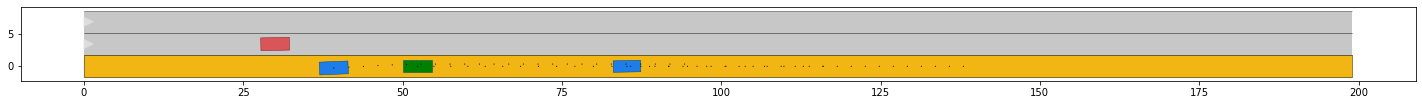

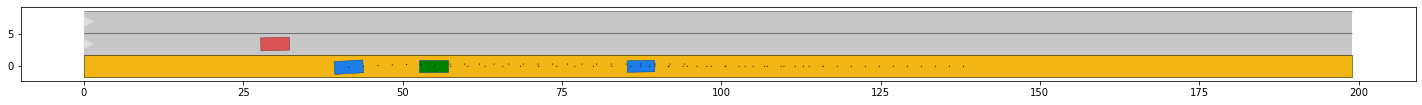

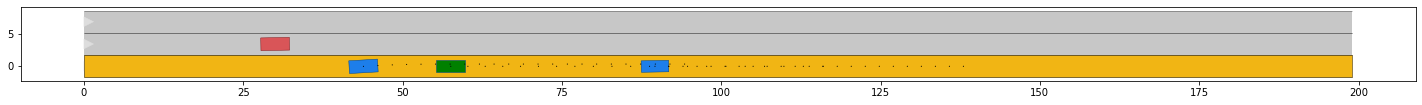

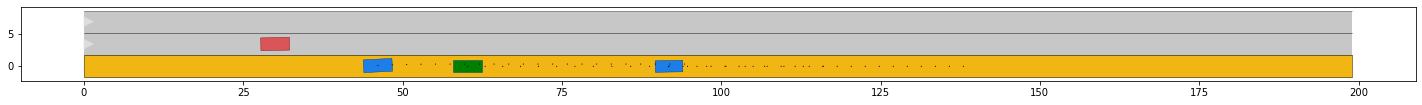

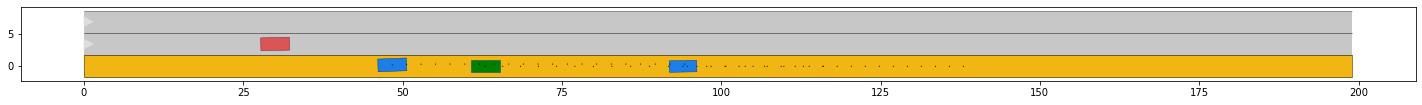

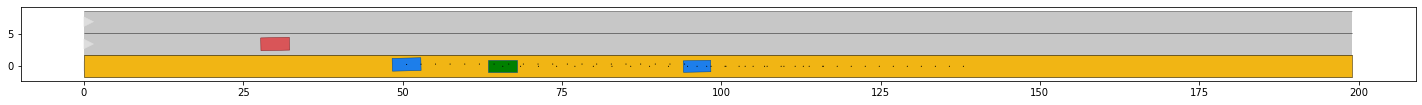

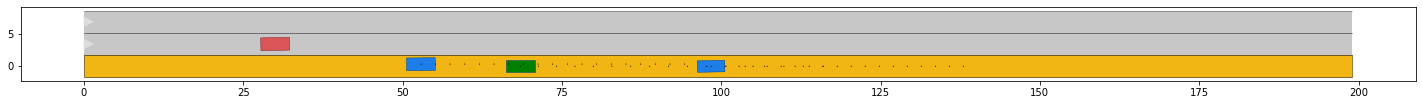

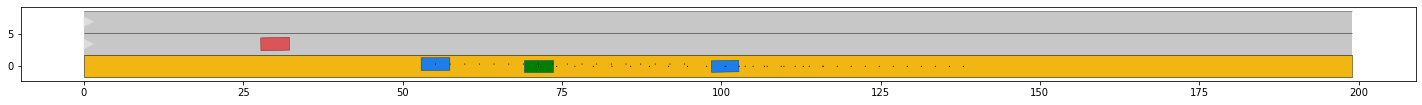

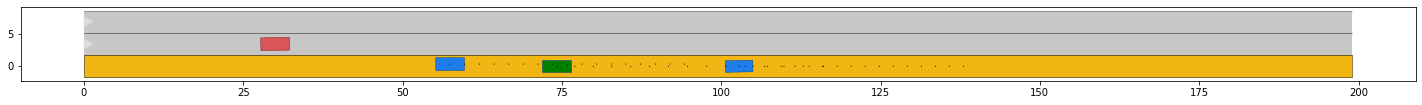

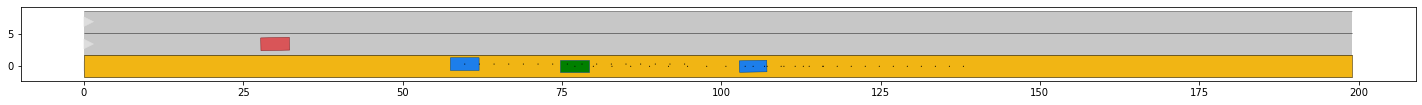

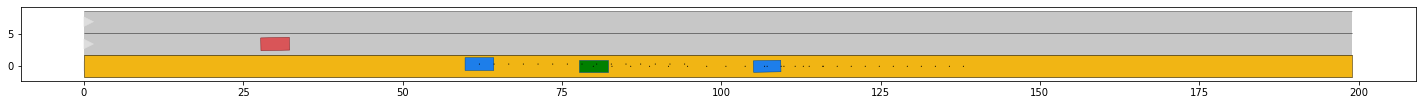

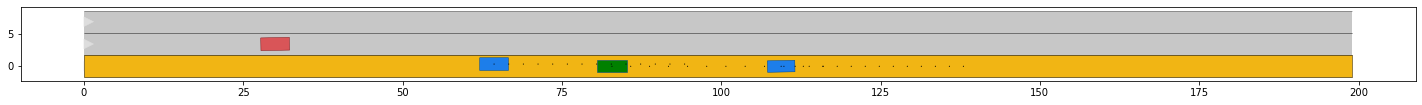

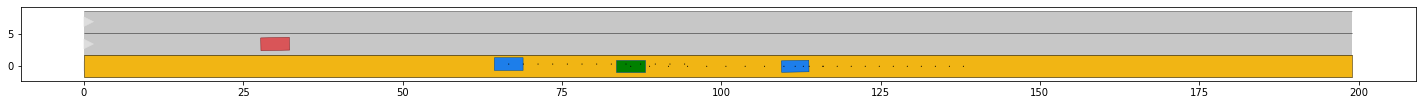

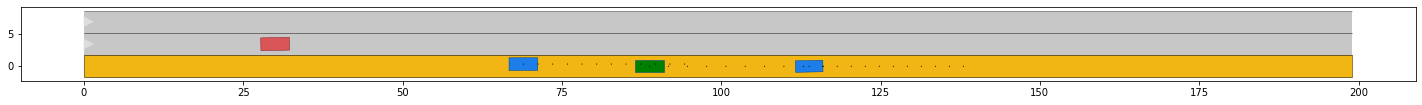

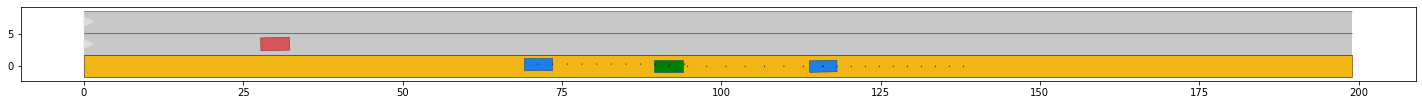

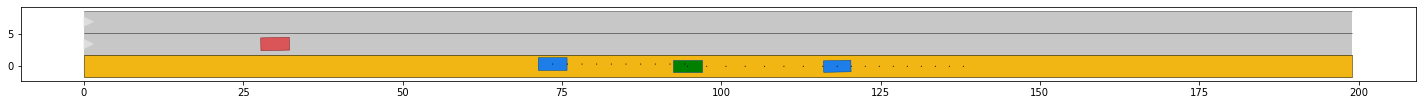

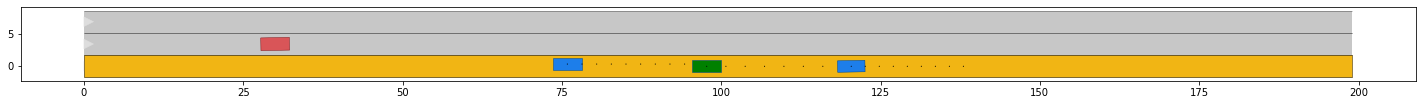

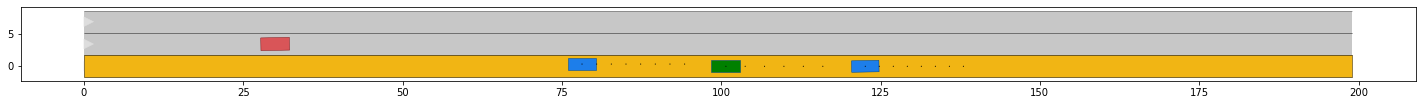

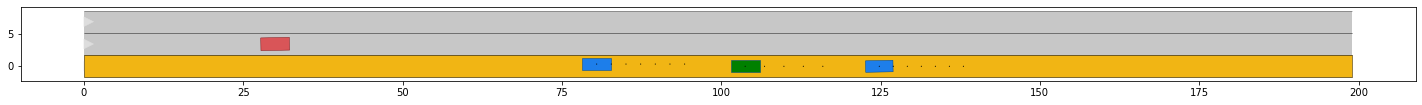

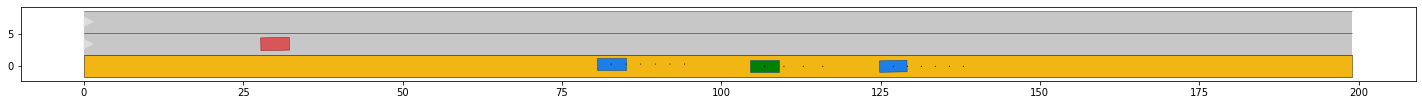

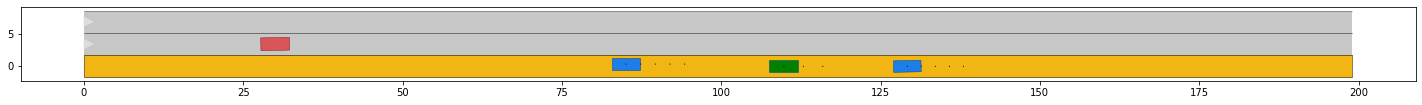

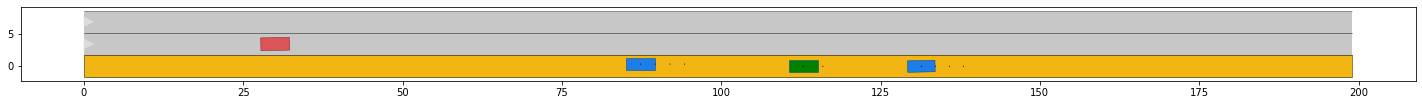

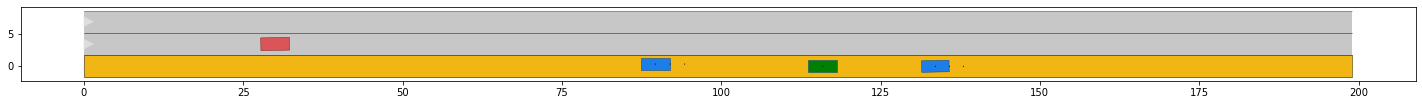

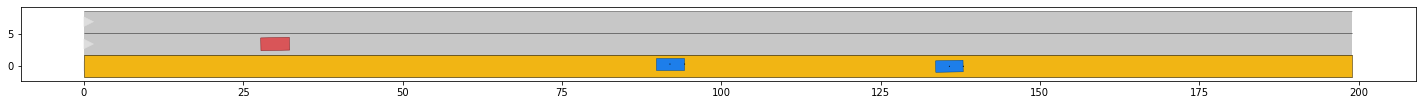

In [225]:
from commonroad.geometry.shape import Rectangle
from commonroad.scenario.obstacle import DynamicObstacle, ObstacleType
from commonroad.scenario.trajectory import Trajectory,State
from commonroad.prediction.prediction import TrajectoryPrediction
from vehiclemodels import parameters_vehicle3

# generate state list of the ego vehicle's trajectory
state_list = [initial_state]
for i in range(1, N):
    orientation = initial_state.orientation
    # compute new position
    # add new state to state_list    
    state_list.append(State(**{'position': npy.array([s_ego[i-1],0]), 'orientation': orientation,
                               'time_step': i-1, 'velocity': v_ego[i]*npy.cos(orientation),
                               'velocity_y': v_ego[i]*npy.sin(orientation)}))

# create the planned trajectory starting at time step 1
ego_vehicle_trajectory = Trajectory(initial_time_step=0, state_list=state_list[1:])
# create the prediction using the planned trajectory and the shape of the ego vehicle

vehicle3 = parameters_vehicle3.parameters_vehicle3()
ego_vehicle_shape = Rectangle(length=vehicle3.l, width=vehicle3.w)
ego_vehicle_prediction = TrajectoryPrediction(trajectory=ego_vehicle_trajectory,
                                              shape=ego_vehicle_shape)

# the ego vehicle can be visualized by converting it into a DynamicObstacle
ego_vehicle_type = ObstacleType.CAR
ego_vehicle = DynamicObstacle(obstacle_id=100, obstacle_type=ego_vehicle_type,
                              obstacle_shape=ego_vehicle_shape, initial_state=initial_state,
                              prediction=ego_vehicle_prediction)

# plot the scenario and the ego vehicle for each time step
for i in range(0, 40):
    plt.figure(figsize=(25, 10))
    rnd = MPRenderer()
    scenario.draw(rnd, draw_params={'time_begin': i})
    ego_vehicle.draw(rnd, draw_params={'time_begin': i, 'dynamic_obstacle': {
        'vehicle_shape': {'occupancy': {'shape': {'rectangle': {
            'facecolor': 'g'}}}}}})
    planning_problem_set.draw(rnd)
    rnd.render()

## Exercise 6

In [226]:
from commonroad.common.solution import CommonRoadSolutionWriter, Solution, PlanningProblemSolution, VehicleModel, VehicleType, CostFunction

pps = PlanningProblemSolution(planning_problem_id=100,
                              vehicle_type=VehicleType.VW_VANAGON,
                              vehicle_model=VehicleModel.PM,
                              cost_function=CostFunction.WX1,
                              trajectory=ego_vehicle_prediction.trajectory)

# define the object with necessary attributes.
solution = Solution(scenario.scenario_id, [pps], computation_time=prob.solver_stats.solve_time)

# write solution to a xml file
csw = CommonRoadSolutionWriter(solution)
csw.write_to_file(overwrite=True)